From scratch:

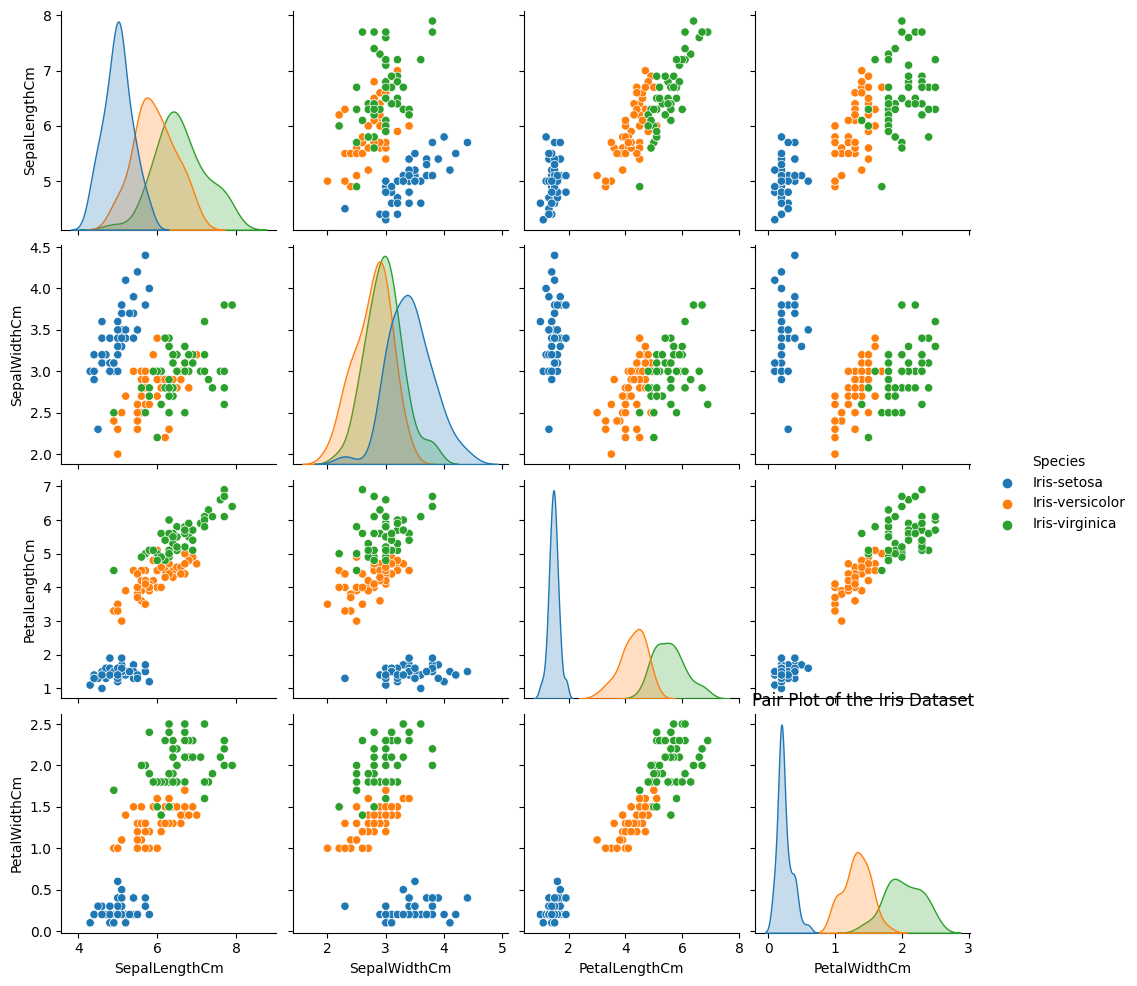

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris_data=pd.read_csv('/content/Iris.csv')

# Plotting the dataset
sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
plt.title("Pair Plot of the Iris Dataset")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

iris_data.drop('Id', axis=1, inplace=True)

X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [15]:
import numpy as np
from collections import Counter

def euclidean_distance(point1, point2): # Calculate the Euclidean distance between two points
    return np.sqrt(np.sum((point1 - point2) ** 2))

def k_nearest_neighbors(X_train, y_train, test_point, k): # Find the k nearest neighbors of test_point in the training set
    distances = []

    for x, label in zip(X_train, y_train): # Calculate distance from test_point to all training points
        dist = euclidean_distance(np.array(x), np.array(test_point))
        distances.append((dist, label))

    # Sort by distance and return the k nearest neighbors
    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest = sorted_distances[:k]

    # Get the labels of the k nearest neighbors
    k_nearest_labels = [label for _, label in k_nearest]

    return k_nearest_labels

def predict(X_train, y_train, X_test, k):
    predictions = []

    for test_point in X_test:
        k_nearest_labels = k_nearest_neighbors(X_train, y_train, test_point, k)
        most_common = Counter(k_nearest_labels).most_common(1)
        predictions.append(most_common[0][0])

    return predictions

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Testing the k-NN implementation
k = 3
y_pred = predict(X_train.values, y_train, X_test.values, k)
accuracy_score = accuracy(y_test, y_pred)
accuracy_score

1.0

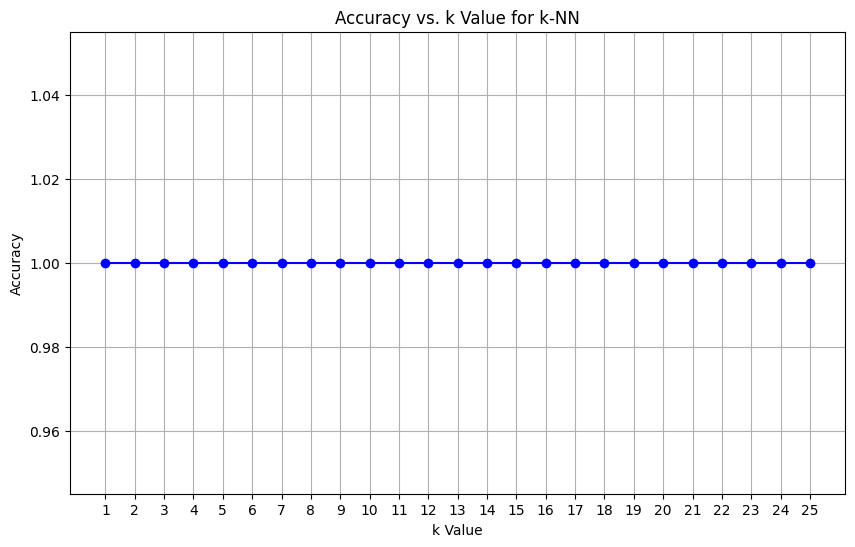

In [16]:
# Varying k and calculating accuracy for each value
k_values = range(1, 26)
accuracies = []

for k in k_values:
    y_pred = predict(X_train.values, y_train, X_test.values, k)
    acc = accuracy(y_test, y_pred)
    accuracies.append(acc)

# Plotting accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. k Value for k-NN')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

From sk-learn:

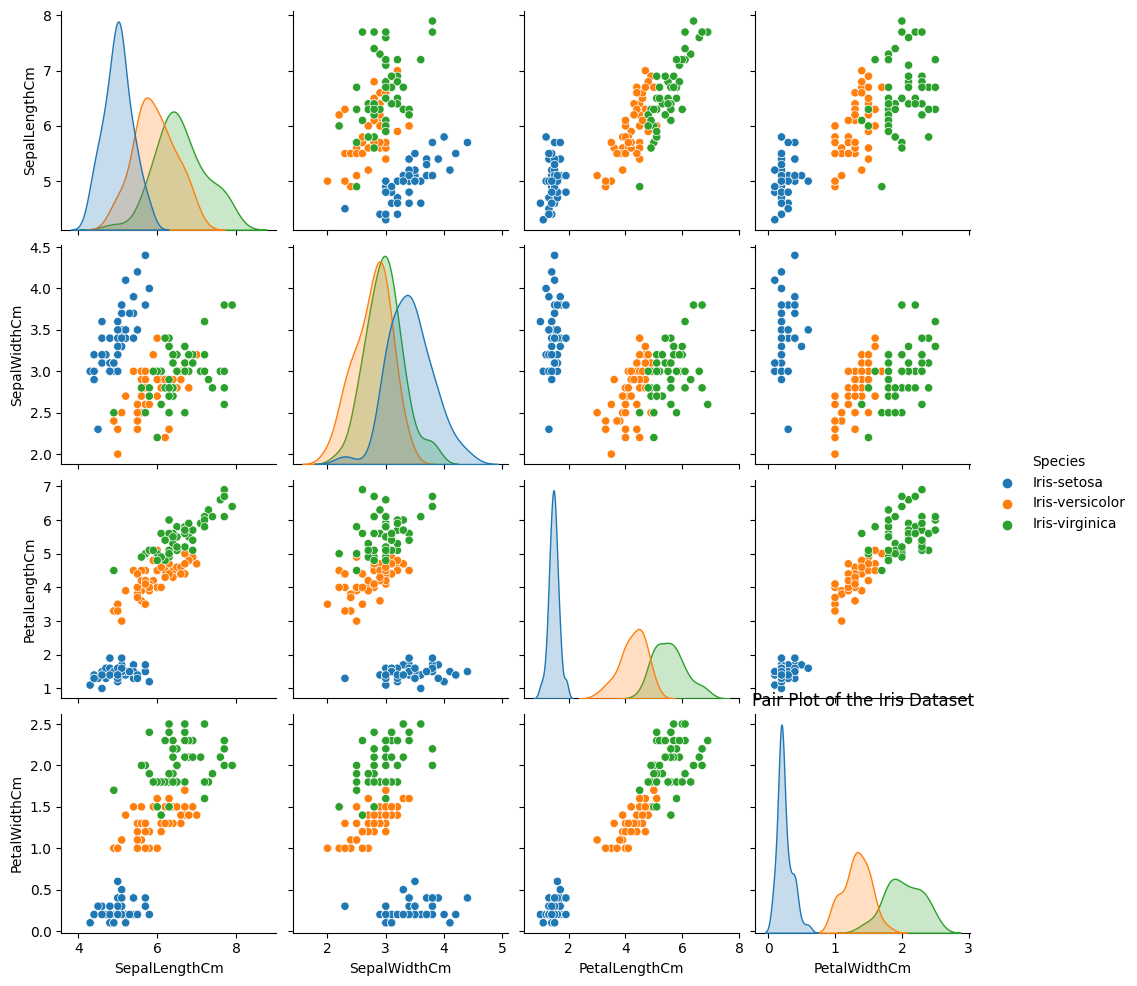

In [17]:
iris_data_sklearn = pd.read_csv('/content/Iris.csv')

sns.pairplot(iris_data_sklearn.drop("Id", axis=1), hue="Species")
plt.title("Pair Plot of the Iris Dataset")
plt.show()

In [18]:
iris_data_sklearn.drop('Id', axis=1, inplace=True)

X_sklearn = iris_data_sklearn.drop('Species', axis=1)
y_sklearn = iris_data_sklearn['Species']

X_train_sklearn, X_test_sklearn, y_train_sklearn, y_test_sklearn = train_test_split(X_sklearn, y_sklearn, test_size=0.3, random_state=42)
X_train_sklearn.shape, X_test_sklearn.shape, y_train_sklearn.shape, y_test_sklearn.shape

((105, 4), (45, 4), (105,), (45,))

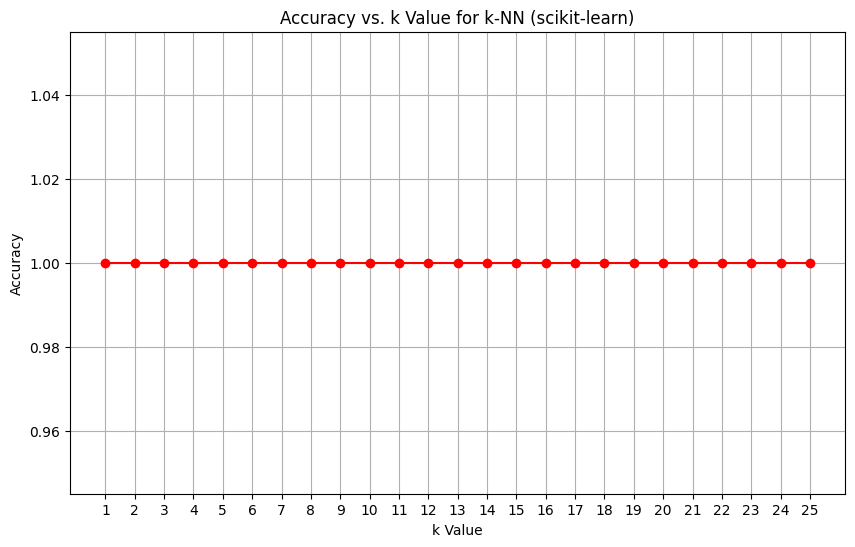

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Implementing k-NN using sk-learn
k_values_sklearn = range(1, 26)
accuracies_sklearn = []

for k in k_values_sklearn:
    knn_sklearn = KNeighborsClassifier(n_neighbors=k)
    knn_sklearn.fit(X_train_sklearn, y_train_sklearn)
    y_pred_sklearn = knn_sklearn.predict(X_test_sklearn)

    # Calculate accuracy
    acc_sklearn = accuracy_score(y_test_sklearn, y_pred_sklearn)
    accuracies_sklearn.append(acc_sklearn)

# Plotting accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values_sklearn, accuracies_sklearn, marker='o', linestyle='-', color='r')
plt.title('Accuracy vs. k Value for k-NN (scikit-learn)')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.xticks(k_values_sklearn)
plt.grid(True)
plt.show()